In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline 

import cv2

import os

In [2]:
NUM_CLASSES = 2

CHANNELS = 3

IMAGE_RESIZE = 224
RESNET50_POOLING_AVERAGE = 'avg'
DENSE_LAYER_ACTIVATION = 'sigmoid'
OBJECTIVE_FUNCTION = 'categorical_crossentropy'

LOSS_METRICS = ['accuracy']

NUM_EPOCHS = 10
EARLY_STOP_PATIENCE = 3

STEPS_PER_EPOCH_TRAINING = 10
STEPS_PER_EPOCH_VALIDATION = 10

BATCH_SIZE_TRAINING = 100
BATCH_SIZE_VALIDATION = 100

BATCH_SIZE_TESTING = 1


In [3]:

from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense


C:\Users\bharadwaj\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
resnet_weights_path = '../crazy/resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [5]:

model = Sequential()

model.add(ResNet50(include_top = False, pooling = RESNET50_POOLING_AVERAGE, weights = resnet_weights_path))

model.add(Dense(NUM_CLASSES, activation = DENSE_LAYER_ACTIVATION))

model.layers[0].trainable = False

Instructions for updating:
Colocations handled automatically by placer.


In [6]:
model.summary() 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2)                 4098      
Total params: 23,591,810
Trainable params: 4,098
Non-trainable params: 23,587,712
_________________________________________________________________


In [7]:
from tensorflow.python.keras import optimizers

sgd = optimizers.SGD(lr = 0.01, decay = 1e-6, momentum = 0.9, nesterov = True)
model.compile(optimizer = sgd, loss = OBJECTIVE_FUNCTION, metrics = LOSS_METRICS)

In [8]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

image_size = IMAGE_RESIZE


data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)


train_generator = data_generator.flow_from_directory(
        '../crazy/cell_images/train',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_TRAINING,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        '../crazy/cell_images/test',
        target_size=(image_size, image_size),
        batch_size=BATCH_SIZE_VALIDATION,
        class_mode='categorical') 

Using TensorFlow backend.


Found 19292 images belonging to 2 classes.
Found 8266 images belonging to 2 classes.


In [9]:
# Max number of steps that these generator will have opportunity to process their source content
# len(train_generator) should be 'no. of available train images / BATCH_SIZE_TRAINING'
# len(valid_generator) should be 'no. of available train images / BATCH_SIZE_VALIDATION'
(BATCH_SIZE_TRAINING, len(train_generator), BATCH_SIZE_VALIDATION, len(validation_generator))


(100, 193, 100, 83)

In [10]:
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

cb_early_stopper = EarlyStopping(monitor = 'val_loss', patience = EARLY_STOP_PATIENCE)
cb_checkpointer = ModelCheckpoint(filepath = '../crazy/best.hdf5', monitor = 'val_loss', save_best_only = True, mode = 'auto')

In [12]:
fit_history = model.fit_generator(
        train_generator,
        steps_per_epoch=STEPS_PER_EPOCH_TRAINING,
        epochs = NUM_EPOCHS,
        validation_data=validation_generator,
        validation_steps=STEPS_PER_EPOCH_VALIDATION,
        callbacks=[cb_checkpointer, cb_early_stopper]
)
model.load_weights("../crazy/best.hdf5")

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
193/193 [==============================] - 11809s 61s/step - loss: 0.2289 - acc: 0.9080 - val_loss: 0.2729 - val_acc: 0.8937
Epoch 2/10
193/193 [==============================] - 11787s 61s/step - loss: 0.1593 - acc: 0.9436 - val_loss: 0.1432 - val_acc: 0.9519
Epoch 3/10
193/193 [==============================] - 11801s 61s/step - loss: 0.1436 - acc: 0.9494 - val_loss: 0.1384 - val_acc: 0.9526
Epoch 4/10
193/193 [==============================] - 11826s 61s/step - loss: 0.1392 - acc: 0.9501 - val_loss: 0.1388 - val_acc: 0.9521
Epoch 5/10
193/193 [==============================] - 11949s 62s/step - loss: 0.1311 - acc: 0.9530 - val_loss: 0.1353 - val_acc: 0.9545
Epoch 6/10
193/193 [==============================] - 11780s 61s/step - loss: 0.1291 - acc: 0.9545 - val_loss: 0.1474 - val_acc: 0.9499
Epoch 7/10
193/193 [==============================] - 13125s 68s/step - loss: 0.1253 - acc: 0.9550 - val_loss: 0.1336 - val_acc: 0.9543


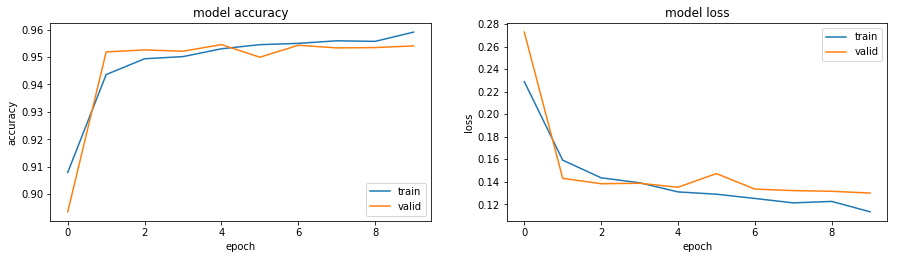

In [13]:
 plt.figure(1, figsize = (15,8)) 
    
plt.subplot(221)  
plt.plot(fit_history.history['acc'])  
plt.plot(fit_history.history['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 
    
plt.subplot(222)  
plt.plot(fit_history.history['loss'])  
plt.plot(fit_history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid']) 

plt.show()

In [3]:
import keras
print(keras.__version__)

2.2.4


In [4]:
import tensorflow as tf
print(tf.__version__)

1.13.1
